In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
#matplotlib inline

In [ ]:
!pip install utils


In [ ]:
!pip install np_utils

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
from utils import *

from keras.models import load_model
from sklearn.datasets import load_files
#from keras.utils import np_utils
from keras.utils import to_categorical
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

In [ ]:
# To mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/My Drive/PhD/GENRE'

/content/gdrive/My Drive/PhD/GENRE


In [ ]:
train = pd.read_csv('multi_label_train.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [ ]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Images/'+train['Id'][i]+'.jpg',target_size=(128,128,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7254/7254 [00:22<00:00, 317.44it/s]


In [ ]:
X.shape

(7254, 128, 128, 3)

"['Comedy']"

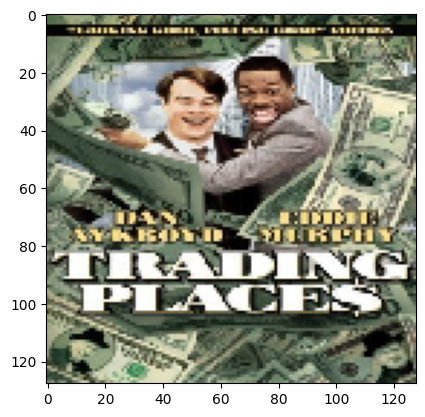

In [ ]:
plt.imshow(X[2])

train['Genre'][2]

In [ ]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 62, 62, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 32)        0

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/5
102/102 [==============================] - 22s 51ms/step - loss: 0.3594 - accuracy: 0.1543 - val_loss: 0.2923 - val_accuracy: 0.1970
Epoch 2/5
102/102 [==============================] - 4s 36ms/step - loss: 0.2770 - accuracy: 0.2091 - val_loss: 0.2540 - val_accuracy: 0.1970
Epoch 3/5
102/102 [==============================] - 4s 35ms/step - loss: 0.2653 - accuracy: 0.2117 - val_loss: 0.2472 - val_accuracy: 0.1970
Epoch 4/5
102/102 [==============================] - 3s 31ms/step - loss: 0.2603 - accuracy: 0.2181 - val_loss: 0.2442 - val_accuracy: 0.1970
Epoch 5/5
102/102 [==============================] - 3s 32ms/step - loss: 0.2573 - accuracy: 0.2161 - val_loss: 0.2435 - val_accuracy: 0.1970


1/1 [==============================] - 0s 363ms/step
Drama (0.498)
Comedy (0.401)
Romance (0.206)


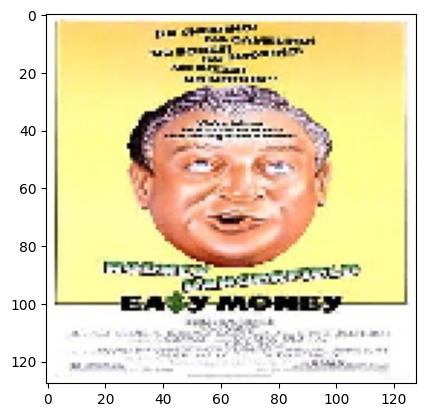

In [ ]:
img = image.load_img('tt0085470.jpg',target_size=(128,128,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,128,128,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)


In [ ]:
#If imagenet weights are being loaded,
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
#base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,3))
base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (128,128,3))

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(25, activation= 'softmax')(x)
model1 = Model(inputs = base_model.input, outputs = predictions)

In [ ]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.01)
model1.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model1.fit(X_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
102/102 [==============================] - 64s 222ms/step - loss: 26.8126 - accuracy: 0.1988
Epoch 2/10
102/102 [==============================] - 22s 218ms/step - loss: 45.5484 - accuracy: 0.1846
Epoch 3/10
102/102 [==============================] - 22s 214ms/step - loss: 69.7651 - accuracy: 0.1824
Epoch 4/10
102/102 [==============================] - 22s 215ms/step - loss: 104.5816 - accuracy: 0.1711
Epoch 5/10
102/102 [==============================] - 22s 220ms/step - loss: 143.0502 - accuracy: 0.1806
Epoch 6/10
102/102 [==============================] - 22s 215ms/step - loss: 188.3168 - accuracy: 0.1772
Epoch 7/10
102/102 [==============================] - 22s 215ms/step - loss: 239.4943 - accuracy: 0.1737
Epoch 8/10
102/102 [==============================] - 22s 216ms/step - loss: 299.9947 - accuracy: 0.1749
Epoch 9/10
102/102 [==============================] - 22s 216ms/step - loss: 349.2919 - accuracy: 0.1722
Epoch 10/10
102/102 [==============================] - 22s